In [64]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'planar_utils'

In [2]:
# Importing Dataset
dataset = pd.read_csv('C:/GitProjects/Logistic Regression with Neural Network/DataSet/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Excluding unnecessary features
X_train = dataset.iloc[:,(2,4,5,6,7,9,11)]
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace = 1)
X_train.isnull().sum()
#df["B"].fillna(df["B"].median())

C:\Users\prashantbhpkr\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [6]:
X_train.groupby(['Embarked'])['Pclass'].count()

Embarked
C    168
Q     77
S    644
Name: Pclass, dtype: int64

In [7]:
X_train['Embarked'].fillna('S', inplace = 1)
X_train.isnull().sum()

C:\Users\prashantbhpkr\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_train['Embarked'])
X_train['Embarked'] = le.transform(X_train['Embarked'])
le.fit(X_train['Sex'])
X_train['Sex'] = le.transform(X_train['Sex'])
X_train.head()

C:\Users\prashantbhpkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\prashantbhpkr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [9]:
X_train = X_train.values
X_train[0:2]

array([[  3.    ,   1.    ,  22.    ,   1.    ,   0.    ,   7.25  ,   2.    ],
       [  1.    ,   0.    ,  38.    ,   1.    ,   0.    ,  71.2833,   0.    ]])

In [10]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder(categorical_features = [6])
X_train = en.fit_transform(X_train).toarray()
X_train[0:2]

array([[  0.    ,   0.    ,   1.    ,   3.    ,   1.    ,  22.    ,
          1.    ,   0.    ,   7.25  ],
       [  1.    ,   0.    ,   0.    ,   1.    ,   0.    ,  38.    ,
          1.    ,   0.    ,  71.2833]])

In [19]:
X_train = X_train[:,1:]
X_train.shape

(891, 7)

In [31]:
Y_train = dataset.iloc[:,1].values
Y_train = Y_train.reshape(1,Y_train.shape[0])
Y_train.shape

(1, 891)

In [33]:
Y_train

array([[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 

In [39]:
print("Number of Training examples: " + str(X_train.shape[0]))
print("Number of Features: " + str(X_train.shape[1]))

Number of Training examples: 891
Number of Features: 7


In [49]:
# Reshaping the matrices:
X_train = X_train.T
X_train.shape

(7, 891)

In [99]:
# Defining sigmoid function
import math
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [101]:
# a = np.array([1,5,7])
x = np.array([1, 2, 3])
print(sigmoid(x))

[ 0.73105858  0.88079708  0.95257413]


In [50]:
# initializing weights and bias values
def initialize_weights(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [107]:
w, b = initialize_weights(5)
print("w: " + str(w))
print("b: " + str(b))

w: [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
b: 0


In [52]:
# Defining forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]
    # Forward Propagation
    A = sigmoid(np.dot(w.T, X)+b)
    cost = -(1/m)*np.sum((Y * np.log(A)) + ((1-Y)*np.log(1-A)))
    
    # Backward Propagation
    dw = np.dot(X, ((A-Y).T))/m
    db = (1/m)*np.sum(A-Y)
    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [108]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


In [113]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print('Cost after iteration %s: %f '%(i, cost))
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs     
        
        

In [114]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


In [123]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0  
    return Y_prediction

In [124]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


In [125]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # Initialize weights
    w, b = initialize_weights(X_train.shape[0])
    
    # Graddient Descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Predict Train/Test examples
    Y_prediction_train = predict(parameters["w"], parameters["b"], X_train)
    Y_prediction_test = predict(parameters["w"], parameters["b"], X_test)
    
    # Printing accuracy
    print("Train Accuracy is : {}".format(100 - np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print("Test Accuracy is : {}".format(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [126]:
# Importing test set and calling model function

testdataset = pd.read_csv('C:/GitProjects/Logistic Regression with Neural Network/DataSet/test.csv')
testdataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
# Time being calling model for train dataset only as preprocessing is required for test dataset
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 1000, learning_rate = 0.005, print_cost = True)
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 5000, learning_rate = 0.005, print_cost = True)
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 10000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147 
Cost after iteration 100: 0.682182 
Cost after iteration 200: 0.668342 
Cost after iteration 300: 0.657069 
Cost after iteration 400: 0.647655 
Cost after iteration 500: 0.639623 
Cost after iteration 600: 0.632632 
Cost after iteration 700: 0.626439 
Cost after iteration 800: 0.620861 
Cost after iteration 900: 0.615767 
Train Accuracy is : 65.20763187429853
Test Accuracy is : 65.20763187429853
Cost after iteration 0: 0.693147 
Cost after iteration 100: 0.682182 
Cost after iteration 200: 0.668342 
Cost after iteration 300: 0.657069 
Cost after iteration 400: 0.647655 
Cost after iteration 500: 0.639623 
Cost after iteration 600: 0.632632 
Cost after iteration 700: 0.626439 
Cost after iteration 800: 0.620861 
Cost after iteration 900: 0.615767 
Cost after iteration 1000: 0.611060 
Cost after iteration 1100: 0.606666 
Cost after iteration 1200: 0.602533 
Cost after iteration 1300: 0.598620 
Cost after iteration 1400: 0.594897 
Cost after iteration 150

-------------------------Learning curve for 1000 iterations-------------------------
Train Accuracy is : 65.20763187429853
Test Accuracy is : 65.20763187429853


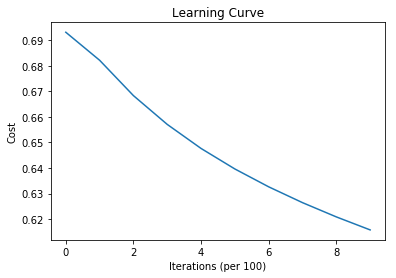

-------------------------Learning curve for 2000 iterations-------------------------
Train Accuracy is : 66.77890011223344
Test Accuracy is : 66.77890011223344


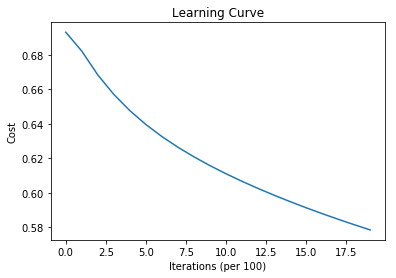

-------------------------Learning curve for 5000 iterations-------------------------
Train Accuracy is : 72.8395061728395
Test Accuracy is : 72.8395061728395


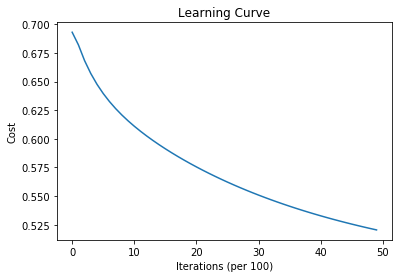

-------------------------Learning curve for 10000 iterations-------------------------
Train Accuracy is : 79.91021324354658
Test Accuracy is : 79.91021324354658


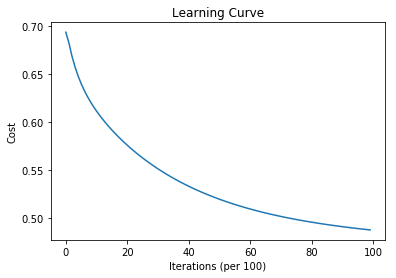

-------------------------Learning curve for 50000 iterations-------------------------
Train Accuracy is : 81.03254769921436
Test Accuracy is : 81.03254769921436


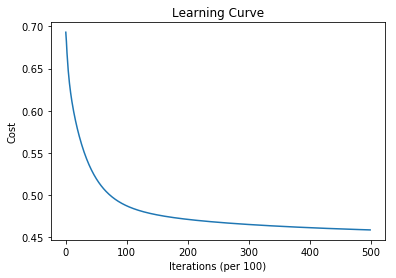

-------------------------Learning curve for 100000 iterations-------------------------
Train Accuracy is : 80.69584736251403
Test Accuracy is : 80.69584736251403


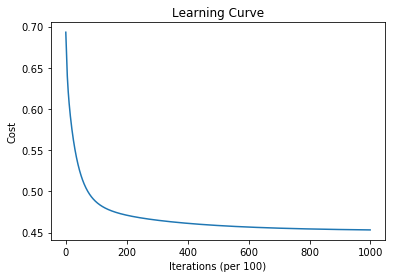

-------------------------Learning curve for 150000 iterations-------------------------
Train Accuracy is : 80.8080808080808
Test Accuracy is : 80.8080808080808


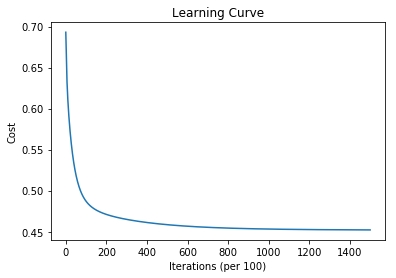

In [139]:
# Plotting the learning Curve:
print('-------------------------Learning curve for 1000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 1000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 2000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 2000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 5000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 5000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 10000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 10000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 50000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 50000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 100000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 100000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()
print('-------------------------Learning curve for 150000 iterations-------------------------')
d = model(X_train, Y_train, X_train, Y_train, num_iterations = 150000, learning_rate = 0.005, print_cost = 0)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.show()